# Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import shapiro
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import brier_score_loss

import statsmodels.api as sm

# Data Overview

In [2]:
df = pd.read_csv("credit_card_churn.csv")

In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df = df.iloc[:,1:21]

In [5]:
df = df.drop("Avg_Open_To_Buy", axis=1)

In [6]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000


In [7]:
df['Attrition_Flag'].loc[df['Attrition_Flag'] == 'Existing Customer'] = 0
df['Attrition_Flag'].loc[df['Attrition_Flag'] == 'Attrited Customer'] = 1

C:\Users\Mehmet\AppData\Local\Temp\ipykernel_9672\3611951346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attrition_Flag'].loc[df['Attrition_Flag'] == 'Existing Customer'] = 0
C:\Users\Mehmet\AppData\Local\Temp\ipykernel_9672\3611951346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attrition_Flag'].loc[df['Attrition_Flag'] == 'Attrited Customer'] = 1


In [8]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000


In [9]:
df["Attrition_Flag"]=df["Attrition_Flag"].astype("int32")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Total_

In [11]:
df.isnull().any()

Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

In [12]:
df.duplicated().sum()

0

In [13]:
df.rename(columns = {'Attrition_Flag':'Churned',}, inplace = True)

In [14]:
df.head()

,Churned,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000


## Statistical Overview

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

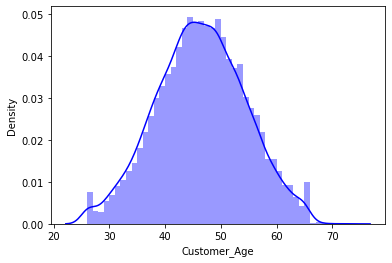

In [15]:
sns.distplot(df['Customer_Age'], color="Blue")

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

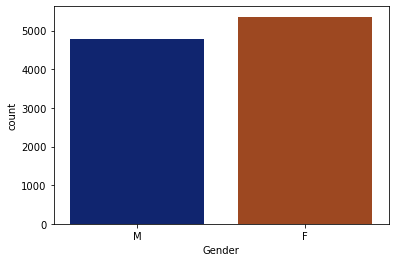

In [16]:
sns.countplot(df['Gender'], palette='dark')

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


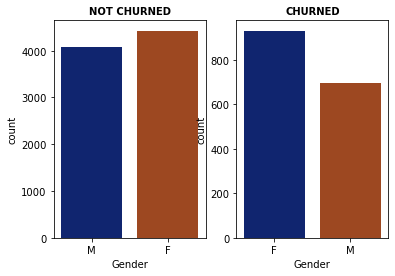

In [17]:
pic1= df[df["Churned"]==1]
pic0= df[df["Churned"]==0]
r= plt.subplot2grid((1,2),(0,0))
sns.countplot(pic0["Gender"], palette= "dark")
plt.title("NOT CHURNED", fontsize= 10, weight= "bold")
#plt.show()
r= plt.subplot2grid((1,2),(0,1))
sns.countplot(pic1["Gender"], palette= "dark")
plt.title("CHURNED", fontsize= 10, weight= "bold")
plt.show()

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education_Level', ylabel='count'>

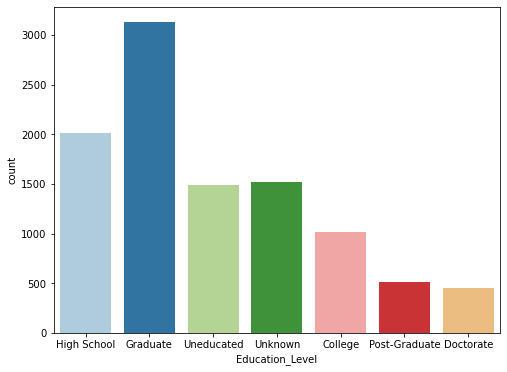

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(df['Education_Level'], palette='Paired')

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


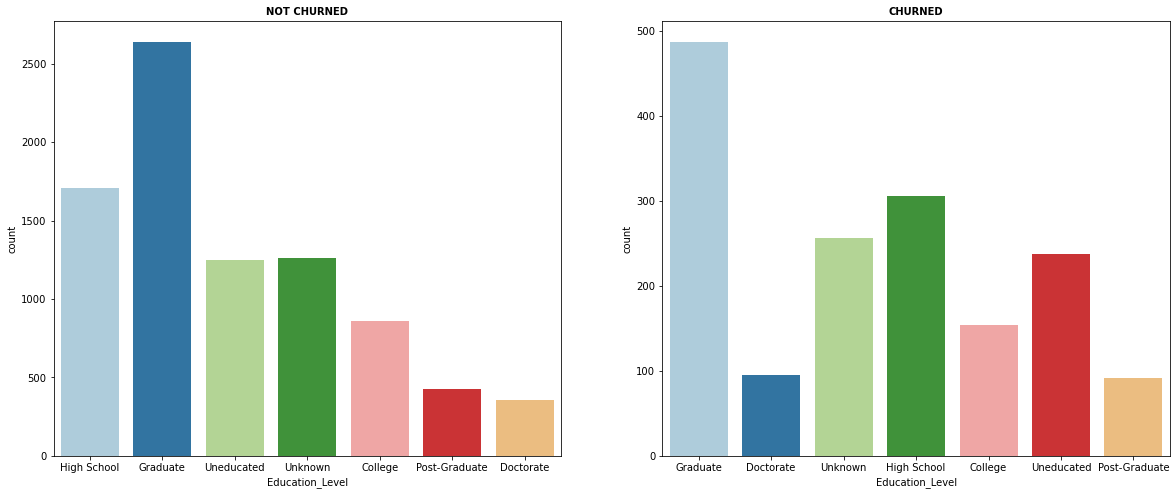

In [19]:
plt.figure(figsize=(20,8))
pic1= df[df["Churned"]==1]
pic0= df[df["Churned"]==0]
r= plt.subplot2grid((1,2),(0,0))
sns.countplot(pic0["Education_Level"], palette= "Paired")
plt.title("NOT CHURNED", fontsize= 10, weight= "bold")
#plt.show()
r= plt.subplot2grid((1,2),(0,1))
sns.countplot(pic1["Education_Level"], palette= "Paired")
plt.title("CHURNED", fontsize= 10, weight= "bold")
plt.show()

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

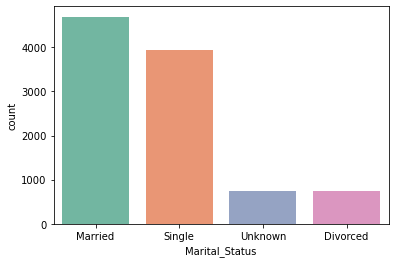

In [20]:
sns.countplot(df['Marital_Status'], palette='Set2')

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


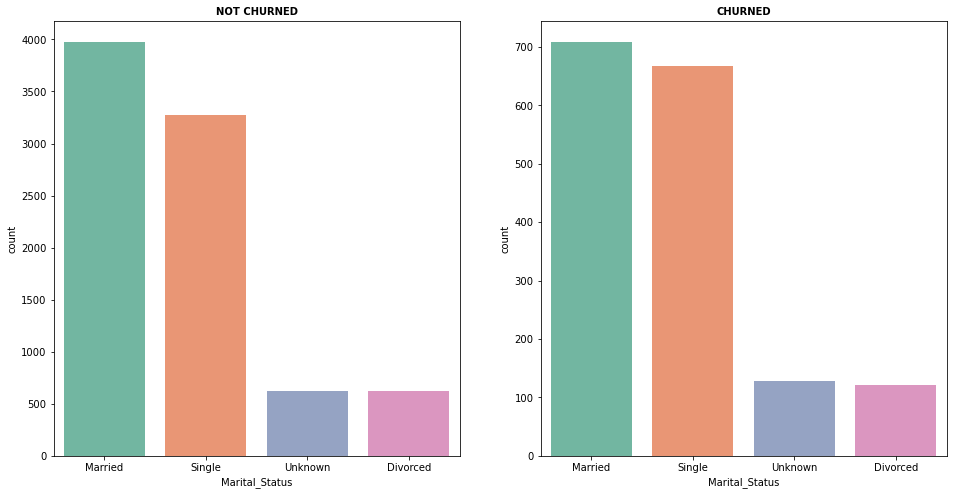

In [21]:
plt.figure(figsize=(16,8))
pic1= df[df["Churned"]==1]
pic0= df[df["Churned"]==0]
r= plt.subplot2grid((1,2),(0,0))
sns.countplot(pic0["Marital_Status"], palette= "Set2")
plt.title("NOT CHURNED", fontsize= 10, weight= "bold")
#plt.show()
r= plt.subplot2grid((1,2),(0,1))
sns.countplot(pic1["Marital_Status"], palette= "Set2")
plt.title("CHURNED", fontsize= 10, weight= "bold")
plt.show()

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income_Category', ylabel='count'>

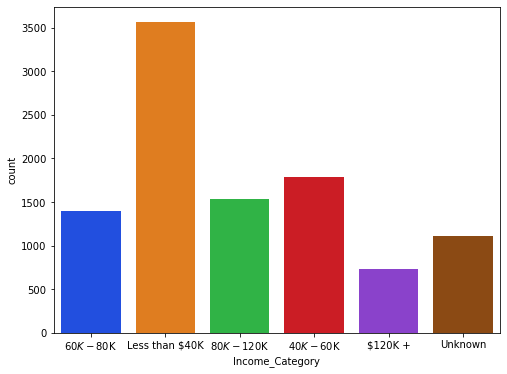

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(df['Income_Category'], palette='bright')

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


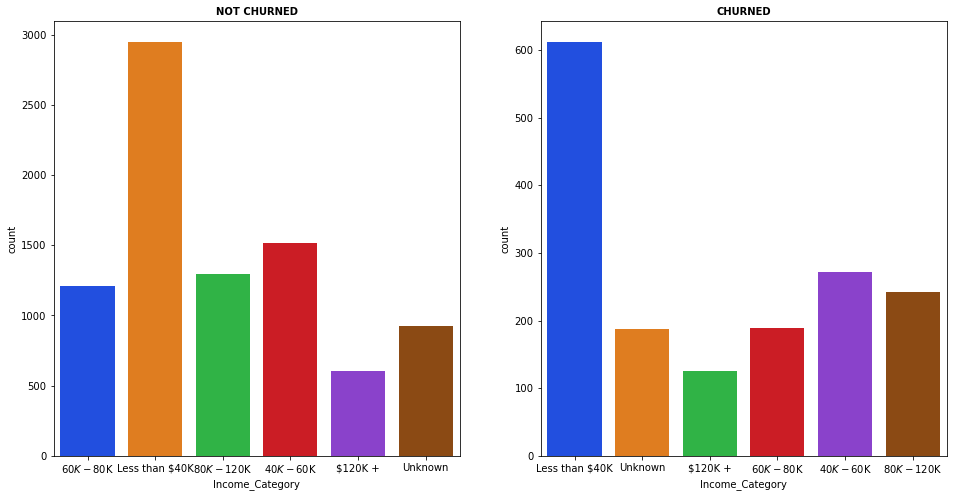

In [23]:
plt.figure(figsize=(16,8))
pic1= df[df["Churned"]==1]
pic0= df[df["Churned"]==0]
r= plt.subplot2grid((1,2),(0,0))
sns.countplot(pic0["Income_Category"], palette= "bright")
plt.title("NOT CHURNED", fontsize= 10, weight= "bold")
#plt.show()
r= plt.subplot2grid((1,2),(0,1))
sns.countplot(pic1["Income_Category"], palette= "bright")
plt.title("CHURNED", fontsize= 10, weight= "bold")
plt.show()

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Card_Category', ylabel='count'>

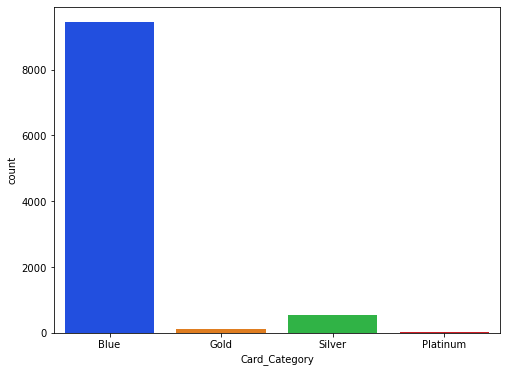

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(df['Card_Category'], palette='bright')

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


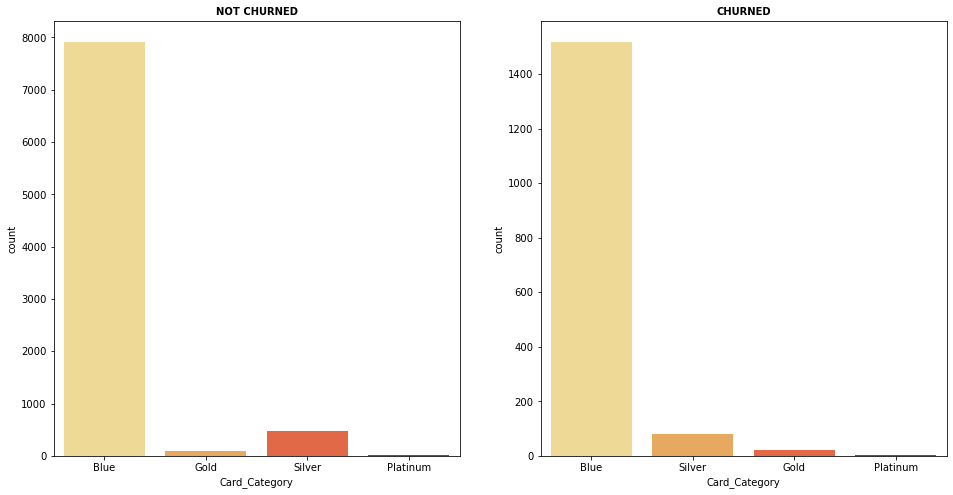

In [25]:
plt.figure(figsize=(16,8))
pic1= df[df["Churned"]==1]
pic0= df[df["Churned"]==0]
r= plt.subplot2grid((1,2),(0,0))
sns.countplot(pic0["Card_Category"], palette= "YlOrRd")
plt.title("NOT CHURNED", fontsize= 10, weight= "bold")
#plt.show()
r= plt.subplot2grid((1,2),(0,1))
sns.countplot(pic1["Card_Category"], palette= "YlOrRd")
plt.title("CHURNED", fontsize= 10, weight= "bold")
plt.show()

C:\Users\Mehmet\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_Limit', ylabel='Density'>

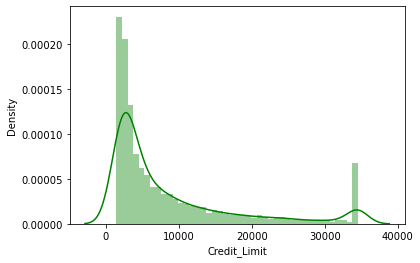

In [26]:
sns.distplot(df['Credit_Limit'], color="Green")

In [27]:
df.shape

(10127, 19)

In [28]:
churn_rate = df.Churned.value_counts() / len(df)
print(" Leaving and non-leaving customer rates:\n\n",churn_rate[1],"\n",churn_rate[0])

 Leaving and non-leaving customer rates:

 0.1606596227905599 
 0.8393403772094401


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Churned,10127.0,0.160660,0.367235,0.0,0.000,0.000,0.000,1.000
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


[Text(0.5, 1.0, 'Correlation Matrix')]

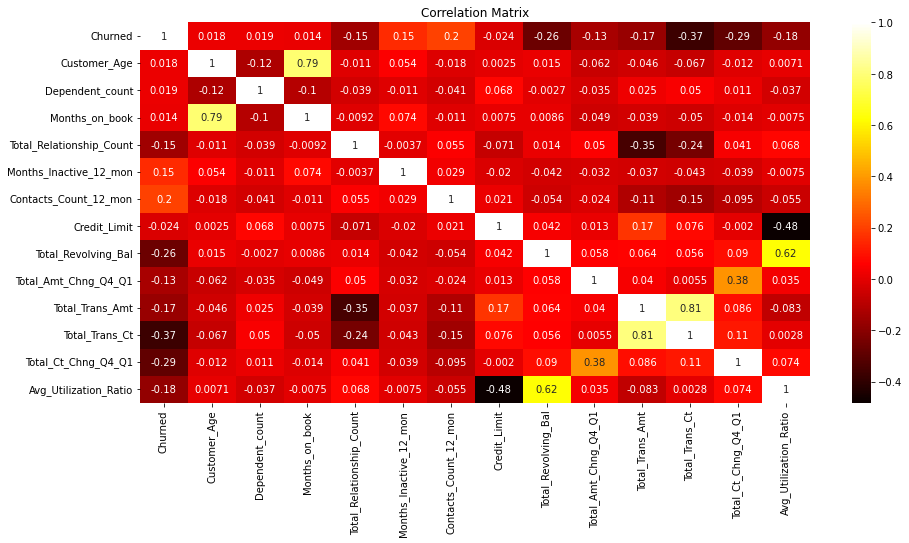

In [30]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, cmap='hot').set(title='Correlation Matrix')

In [31]:
df.groupby("Churned").mean()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Churned,,,,,,,,,,,,,
0,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,0.772510,4654.655882,68.672588,0.742434,0.296412
1,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,0.694277,3095.025814,44.933620,0.554386,0.162475


***We wonder whether if not there is a statististical signifance difference between the mean of customer's credit limit who's leaved and who's not.
To learn this we can apply a statistical test that name is two-sample t-test. To conduct a valid test data in each group must normally distributed and the variances for the two independent groups must equal.***

<d><i>C</i><sub>0</sub>: Credit limit of customer who's not leaved

<d><i>C</i><sub>1</sub>: Tenures of customer who's leaved

**Hypothesis:**

<d><i>H</i><sub>0</sub>:  There is no difference between the distribution of <d><i>C</i><sub>0</sub> and the normal distribution.  
<d><i>H</i><sub>1</sub>:  There is difference between the distribution of <d><i>C</i><sub>1</sub> and the normal distribution.  

In [32]:
for_t0_normality_test = df.loc[(df['Churned'] == 0)]
for_t1_normality_test = df.loc[(df['Churned'] == 1)]

In [33]:
name = ['normality test', 'p-value']
test = shapiro(for_t0_normality_test.Credit_Limit)
 
print(test, "\n") 
 
if test[1] > 0.05:
    print('We can not reject null hypothesis. There is enough evidence to say that C0 is normally distributed.')
 
else:
    print('We reject null hypothesis. There is no enough evidence to say that C0 is normally distributed.')

ShapiroResult(statistic=0.7462177872657776, pvalue=0.0) 

We reject null hypothesis. There is no enough evidence to say that C0 is normally distributed.


C:\Users\Mehmet\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


***Because of we reject the null hypothesis for <d><i>C</i><sub>0</sub> there is no need to check normality of <d><i>C</i><sub>1</sub> and instead of two-sample t-test we will use Mann-Whitney U test which is non-parametric.***

<d><i>μ</i><sub>0</sub>: The mean of <d><i>C</i><sub>0</sub>

<d><i>μ</i><sub>1</sub>: The mean of <d><i>C</i><sub>1</sub>

**Hypothesis:**

<d><i>H</i><sub>0</sub>: <d><i>μ</i><sub>0</sub>=<d><i>μ</i><sub>1</sub>

<d><i>H</i><sub>0</sub>: <d><i>μ</i><sub>0</sub>≠<d><i>μ</i><sub>1</sub>

In [34]:
name = ['Mann Whitney-U', 'p-value']
test = stats.mannwhitneyu(for_t0_normality_test.Credit_Limit, for_t1_normality_test.Credit_Limit)
 
print("p-value: %.3f" % test[1], "\n") 
 
if test[1] > 0.05:
    print('We can not reject null hypothesis. There is enough evidence to say that there is no difference between μo and μ1.')
 
else:
    print('We reject null hypothesis. There is no enough evidence to say that there is no difference between μo and μ1.')

p-value: 0.000 

We reject null hypothesis. There is no enough evidence to say that there is no difference between μo and μ1.


***In according to Mann-Whitney U test result we can say that the credit limit of customers who's leaved is smaller than customers who's not leaved***

# Model

## Preparing Data for Modeling

In [35]:
df.head()

,Churned,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000


In [36]:
df_model = df

label_encoder = preprocessing.LabelEncoder()
  
df_model['Gender']= label_encoder.fit_transform(df_model['Gender'])

df_model.head()

,Churned,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,0,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,0,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,0,40,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,0,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000


In [37]:
df_model["Education_Level"].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [38]:
df_model['Education_Level'].loc[df_model['Education_Level'] == 'Uneducated'] = 1
df_model['Education_Level'].loc[df_model['Education_Level'] == 'High School'] = 2
df_model['Education_Level'].loc[df_model['Education_Level'] == 'College'] = 3
df_model['Education_Level'].loc[df_model['Education_Level'] == 'Unknown'] = 4
df_model['Education_Level'].loc[df_model['Education_Level'] == 'Graduate'] = 5
df_model['Education_Level'].loc[df_model['Education_Level'] == 'Post-Graduate'] = 7
df_model['Education_Level'].loc[df_model['Education_Level'] == 'Doctorate'] = 7

df["Education_Level"]=df["Education_Level"].astype("int32")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churned                   10127 non-null  int32  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int32  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int32  
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Total_

C:\Users\Mehmet\AppData\Local\Temp\ipykernel_9672\584040032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Education_Level'].loc[df_model['Education_Level'] == 'Uneducated'] = 1
C:\Users\Mehmet\AppData\Local\Temp\ipykernel_9672\584040032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Education_Level'].loc[df_model['Education_Level'] == 'High School'] = 2
C:\Users\Mehmet\AppData\Local\Temp\ipykernel_9672\584040032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [39]:
df_model.head()

,Churned,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,2,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,0,49,0,5,5,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,0,51,1,3,5,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,0,40,0,4,2,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,0,40,1,3,1,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000


In [40]:
df_model["Marital_Status"].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [41]:
df_model["Income_Category"].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [42]:
df_model["Card_Category"].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [43]:
df_model = pd.get_dummies(df_model, columns = ['Marital_Status',"Income_Category", "Card_Category"])

In [44]:
df_model.head()

,Churned,Customer_Age,Gender,Dependent_count,Education_Level,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,1,3,2,39,5,1,3,12691.0,...,0,0,1,0,0,0,1,0,0,0
1,0,49,0,5,5,44,6,1,2,8256.0,...,0,0,0,0,1,0,1,0,0,0
2,0,51,1,3,5,36,4,1,0,3418.0,...,0,0,0,1,0,0,1,0,0,0
3,0,40,0,4,2,34,3,4,1,3313.0,...,0,0,0,0,1,0,1,0,0,0
4,0,40,1,3,1,21,5,1,0,4716.0,...,0,0,1,0,0,0,1,0,0,0


In [45]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Churned                         10127 non-null  int32  
 1   Customer_Age                    10127 non-null  int64  
 2   Gender                          10127 non-null  int32  
 3   Dependent_count                 10127 non-null  int64  
 4   Education_Level                 10127 non-null  int32  
 5   Months_on_book                  10127 non-null  int64  
 6   Total_Relationship_Count        10127 non-null  int64  
 7   Months_Inactive_12_mon          10127 non-null  int64  
 8   Contacts_Count_12_mon           10127 non-null  int64  
 9   Credit_Limit                    10127 non-null  float64
 10  Total_Revolving_Bal             10127 non-null  int64  
 11  Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 12  Total_Trans_Amt                 

In [46]:
x = df_model.drop("Churned", axis=1)
y = df_model["Churned"]

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=3)

## Logistic Regression

In [48]:
logr= LogisticRegression()
logr.fit(x_train, y_train)

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
logr_predicts= logr.predict(x_test)

In [50]:
logr_cm= confusion_matrix(y_test, logr_predicts)
print("\nLogistic Regression Confusion Matrix:\n")
print(logr_cm)


Logistic Regression Confusion Matrix:

[[2698  120]
 [ 309  215]]


In [51]:
target_names = ['Not Churned', 'Churned']
print(classification_report(y_test, logr_predicts, target_names=target_names))

              precision    recall  f1-score   support

 Not Churned       0.90      0.96      0.93      2818
     Churned       0.64      0.41      0.50       524

    accuracy                           0.87      3342
   macro avg       0.77      0.68      0.71      3342
weighted avg       0.86      0.87      0.86      3342



* Precision-Recall Curve

In [52]:
logr_class1_probs = logr.predict_proba(x_test)[:, 1]

f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    logr_thresh_predicts = logr_class1_probs > threshold
    precision = precision_score(y_test, logr_thresh_predicts)
    recall = recall_score(y_test, logr_thresh_predicts)
    f1 = f1_score(y_test, logr_thresh_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.157, Completeness = 1.000 | F1 = 0.271
Threshold = 0.01 | Accuracy = 0.184, Completeness = 0.998 | F1 = 0.310
Threshold = 0.02 | Accuracy = 0.214, Completeness = 0.994 | F1 = 0.352
Threshold = 0.03 | Accuracy = 0.240, Completeness = 0.989 | F1 = 0.387
Threshold = 0.04 | Accuracy = 0.264, Completeness = 0.979 | F1 = 0.416
Threshold = 0.05 | Accuracy = 0.281, Completeness = 0.956 | F1 = 0.435
Threshold = 0.06 | Accuracy = 0.303, Completeness = 0.948 | F1 = 0.460
Threshold = 0.07 | Accuracy = 0.324, Completeness = 0.947 | F1 = 0.482
Threshold = 0.08 | Accuracy = 0.338, Completeness = 0.926 | F1 = 0.495
Threshold = 0.09 | Accuracy = 0.351, Completeness = 0.912 | F1 = 0.507
Threshold = 0.10 | Accuracy = 0.365, Completeness = 0.905 | F1 = 0.521
Threshold = 0.11 | Accuracy = 0.376, Completeness = 0.893 | F1 = 0.529
Threshold = 0.12 | Accuracy = 0.387, Completeness = 0.876 | F1 = 0.537
Threshold = 0.13 | Accuracy = 0.398, Completeness = 0.868 | F1 = 0.546
Thresh

In [53]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    logr_thresh_predicts = logr_class1_probs > threshold
    f1 = f1_score(y_test, logr_thresh_predicts)
    if f1_list.max() == f1:
        logr_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", logr_best_threshold)

Maximum f1 score is: 0.584 and best threshold is: 0.32


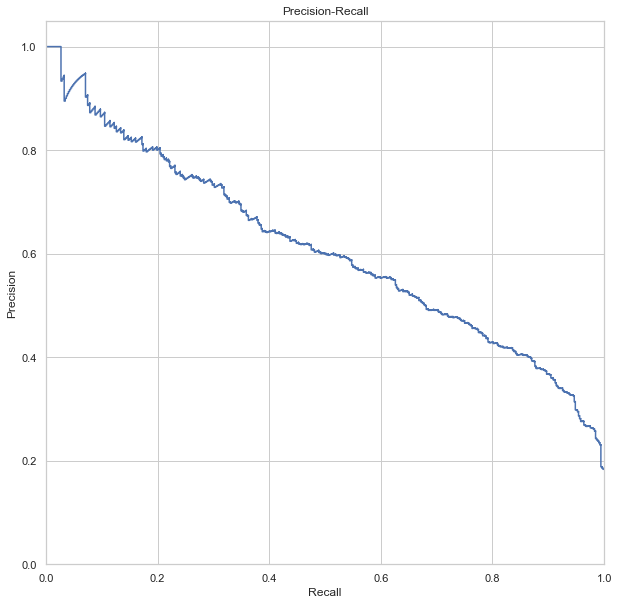

In [54]:
precision, recall, threshold = precision_recall_curve(y_test, logr_class1_probs)

sns.set_theme(style= "whitegrid")
plt.figure(figsize=(10,10))
plt.step(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall')
plt.show()

In [55]:
print('Logistic Regression AUC score: %.3f' % average_precision_score(y_test, logr_class1_probs)) 

Logistic Regression AUC score: 0.610


In [56]:
def custom_predict(X, threshold):
    #probs = logr.predict_proba(x_test) 
    return (logr_class1_probs > threshold).astype(int)
    
    
logr_thresh_predicts = custom_predict(X = x_test, threshold = logr_best_threshold) 

In [57]:
logr_thresh_cm= confusion_matrix(y_test, logr_thresh_predicts)
print("\nLogistic Regression Confusion Matrix:\n")
print(logr_thresh_cm)


Logistic Regression Confusion Matrix:

[[2557  261]
 [ 200  324]]


In [58]:
target_names = ['Not Churned', 'Churned']
print(classification_report(y_test, logr_thresh_predicts, target_names=target_names))

              precision    recall  f1-score   support

 Not Churned       0.93      0.91      0.92      2818
     Churned       0.55      0.62      0.58       524

    accuracy                           0.86      3342
   macro avg       0.74      0.76      0.75      3342
weighted avg       0.87      0.86      0.87      3342



In [59]:
print("Logistic Regression Brier Score:",brier_score_loss(y_test, logr_class1_probs))

Logistic Regression Brier Score: 0.08903616482795411


* Model Tuning

In [60]:
logr_prmt = {"penalty": ["l1", "l2", "elastic_net", "none"],
           "C": [1, 5, 10, 0.5, 0.1, 0.05],
           "class_weight": ["balanced", "weight"],
           "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
          }

In [61]:
logr_cv_model = GridSearchCV(logr, 
                           logr_prmt, 
                           cv = 10, 
                            n_jobs = -1)

In [62]:
logr_cv_model.fit(x_train, y_train)

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1200 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueEr

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 0.5, 0.1, 0.05],
                         'class_weight': ['balanced', 'weight'],
                         'penalty': ['l1', 'l2', 'elastic_net', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [63]:
print("Best parameters:", logr_cv_model.best_params_)

Best parameters: {'C': 5, 'class_weight': 'weight', 'penalty': 'l2', 'solver': 'newton-cg'}


In [64]:
logr_tuned= LogisticRegression(C=logr_cv_model.best_params_["C"], 
                       class_weight=logr_cv_model.best_params_["class_weight"],
                       penalty=logr_cv_model.best_params_["penalty"],
                       solver=logr_cv_model.best_params_["solver"])

logr_tuned.fit(x_train, y_train)

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(C=5, class_weight='weight', solver='newton-cg')

In [65]:
logr_tuned_predicts= logr_tuned.predict(x_test)

logr_tuned_cm = confusion_matrix(y_test, logr_tuned_predicts)
print("\nLogistic Regression Confusion Matrix:\n")
print(logr_tuned_cm)


Logistic Regression Confusion Matrix:

[[2721   97]
 [ 223  301]]


In [66]:
print(classification_report(y_test, logr_tuned_predicts, target_names=target_names))

              precision    recall  f1-score   support

 Not Churned       0.92      0.97      0.94      2818
     Churned       0.76      0.57      0.65       524

    accuracy                           0.90      3342
   macro avg       0.84      0.77      0.80      3342
weighted avg       0.90      0.90      0.90      3342



* Final Model

In [67]:
logr_class1_probs_tuned = logr_tuned.predict_proba(x_test)[:, 1]

f1_list = []
for threshold in np.arange(0, 0.95, 0.01):
    logr_tuned_thres_predicts = logr_class1_probs_tuned > threshold
    precision = precision_score(y_test, logr_tuned_thres_predicts)
    recall = recall_score(y_test, logr_tuned_thres_predicts)
    f1 = f1_score(y_test, logr_tuned_thres_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.157, Completeness = 1.000 | F1 = 0.271
Threshold = 0.01 | Accuracy = 0.209, Completeness = 0.996 | F1 = 0.345
Threshold = 0.02 | Accuracy = 0.247, Completeness = 0.989 | F1 = 0.396
Threshold = 0.03 | Accuracy = 0.278, Completeness = 0.987 | F1 = 0.433
Threshold = 0.04 | Accuracy = 0.303, Completeness = 0.981 | F1 = 0.462
Threshold = 0.05 | Accuracy = 0.327, Completeness = 0.968 | F1 = 0.489
Threshold = 0.06 | Accuracy = 0.349, Completeness = 0.956 | F1 = 0.511
Threshold = 0.07 | Accuracy = 0.367, Completeness = 0.943 | F1 = 0.528
Threshold = 0.08 | Accuracy = 0.383, Completeness = 0.933 | F1 = 0.543
Threshold = 0.09 | Accuracy = 0.399, Completeness = 0.922 | F1 = 0.556
Threshold = 0.10 | Accuracy = 0.412, Completeness = 0.916 | F1 = 0.568
Threshold = 0.11 | Accuracy = 0.428, Completeness = 0.908 | F1 = 0.582
Threshold = 0.12 | Accuracy = 0.446, Completeness = 0.903 | F1 = 0.597
Threshold = 0.13 | Accuracy = 0.460, Completeness = 0.895 | F1 = 0.608
Thresh

In [68]:
f1_list = np.asarray(f1_list)
f1_list.max()

for threshold in np.arange(0, 0.95, 0.01):
    logr_tuned_thres_predicts = logr_class1_probs_tuned > threshold
    f1 = f1_score(y_test, logr_tuned_thres_predicts)
    if f1_list.max() == f1:
        logr_tuned_best_threshold = threshold


print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", logr_tuned_best_threshold)

Maximum f1 score is: 0.688 and best threshold is: 0.28


* Precision-Recall Curve

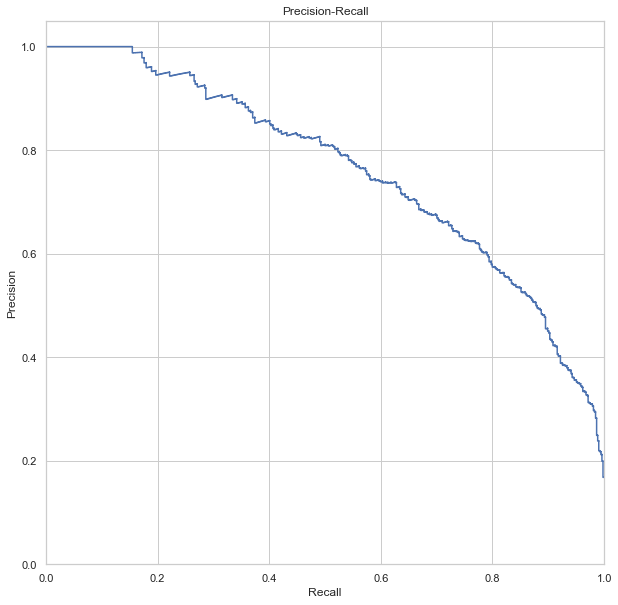

In [69]:
precision, recall, threshold = precision_recall_curve(y_test, logr_class1_probs_tuned)

sns.set_theme(style= "whitegrid")
plt.figure(figsize=(10,10))
plt.step(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall')
plt.show() 

In [70]:
print('Tuned Logistic Regression AUC Score: %.3f' % average_precision_score(y_test, logr_class1_probs_tuned)) 

Tuned Logistic Regression AUC Score: 0.763


In [71]:
def custom_predict(X, threshold):

    return (logr_class1_probs_tuned > threshold).astype(int)
    
    
logr_final_predicts = custom_predict(X=x_test, threshold = logr_tuned_best_threshold) 

In [72]:
logr_final_cm = confusion_matrix(y_test, logr_final_predicts)
print("\nTuned Logistic Regression Confusion Matrix:\n")
print(logr_final_cm)


Tuned Logistic Regression Confusion Matrix:

[[2566  252]
 [ 117  407]]


In [73]:
print(classification_report(y_test, logr_final_predicts, target_names=target_names))

              precision    recall  f1-score   support

 Not Churned       0.96      0.91      0.93      2818
     Churned       0.62      0.78      0.69       524

    accuracy                           0.89      3342
   macro avg       0.79      0.84      0.81      3342
weighted avg       0.90      0.89      0.89      3342



In [74]:
print("Brier score:",brier_score_loss(y_test, logr_class1_probs_tuned))

Brier score: 0.0686356221749847


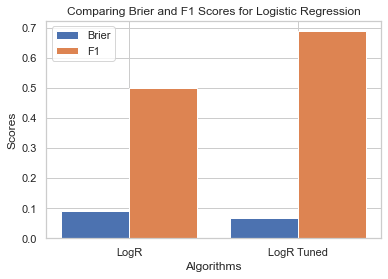

In [75]:
brier_scores = [brier_score_loss(y_test, logr_class1_probs), brier_score_loss(y_test, logr_class1_probs_tuned)]
f1_scores =[f1_score(y_test, logr_predicts), f1_score(y_test, logr_final_predicts)]
X = ['LogR','LogR Tuned']

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, brier_scores, 0.4, label = 'Brier')
plt.bar(X_axis + 0.2, f1_scores, 0.4, label = 'F1')
  
plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("Scores")
plt.title("Comparing Brier and F1 Scores for Logistic Regression")
plt.legend()
plt.show()

In [76]:
print("Constant of equation:\n\n", logr_tuned.intercept_)

print("\nCoefficents of equation:\n\n", logr_tuned.coef_)

Constant of equation:

 [2.52872626]

Coefficents of equation:

 [[ 1.20723813e-02 -7.13820748e-01  1.79874604e-01  5.29605827e-02
  -6.46486693e-03 -3.86625601e-01  5.21787097e-01  4.88023660e-01
  -1.77177829e-05 -7.90310827e-04 -1.58937138e-01  4.62834415e-04
  -1.13055308e-01 -2.70274887e+00 -4.69599911e-01  6.22922013e-01
   2.32488371e-01  7.83855086e-01  8.27973235e-01  8.13946861e-01
   2.08859461e-01  3.13968863e-01  5.04479442e-01  3.57045721e-01
   2.68938357e-01  6.52713400e-01  8.47146330e-01  7.26707794e-02
   8.94708195e-01]]


In [77]:
input_data= (43, 0, 2, 5, 25, 6, 2, 4, 10388, 1961, 0.703, 10294, 61, 0.649, 0.189, 0,1,0,0,0,0,0,0,1,0,0,0,0,1)
input_data= np.asarray(input_data)
input_data= input_data.reshape(1,-1)
prob= logr_tuned.predict_proba(input_data)[:, 1][0]

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [81]:
def custom_predict(X, threshold):

    return (prob > threshold).astype(int)
    
    
result = custom_predict(X=input_data, threshold = logr_tuned_best_threshold) 

print("The probability of churn: %", prob)

if result==1:
    print("\nThe person is churned")
else:
    print("\nThe person is still customer")

The probability of churn: % 0.4627061997532443

The person is churned


## Random Forest

In [82]:
rf= RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [83]:
rf_preds= rf.predict(x_test)

In [84]:
rf_cm= confusion_matrix(y_test, rf_preds)
print("\nRandom Forest Confusion Matrix:\n")
print(rf_cm)


Random Forest Confusion Matrix:

[[2777   41]
 [  92  432]]


In [85]:
print(classification_report(y_test, rf_preds, target_names=target_names))

              precision    recall  f1-score   support

 Not Churned       0.97      0.99      0.98      2818
     Churned       0.91      0.82      0.87       524

    accuracy                           0.96      3342
   macro avg       0.94      0.90      0.92      3342
weighted avg       0.96      0.96      0.96      3342



* Precision-Recall Curve

In [86]:
rf_class1_probs = rf.predict_proba(x_test)[:, 1]


f1_list = []

for threshold in np.arange(0, 0.95, 0.01):
    rf_thres_predicts = rf_class1_probs > threshold
    precision = precision_score(y_test, rf_thres_predicts)
    recall = recall_score(y_test, rf_thres_predicts)
    f1 = f1_score(y_test, rf_thres_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.212, Completeness = 1.000 | F1 = 0.349
Threshold = 0.01 | Accuracy = 0.260, Completeness = 1.000 | F1 = 0.413
Threshold = 0.02 | Accuracy = 0.299, Completeness = 1.000 | F1 = 0.461
Threshold = 0.03 | Accuracy = 0.331, Completeness = 1.000 | F1 = 0.497
Threshold = 0.04 | Accuracy = 0.363, Completeness = 1.000 | F1 = 0.533
Threshold = 0.05 | Accuracy = 0.389, Completeness = 1.000 | F1 = 0.560
Threshold = 0.06 | Accuracy = 0.420, Completeness = 1.000 | F1 = 0.591
Threshold = 0.07 | Accuracy = 0.441, Completeness = 0.998 | F1 = 0.612
Threshold = 0.08 | Accuracy = 0.473, Completeness = 0.996 | F1 = 0.642
Threshold = 0.09 | Accuracy = 0.500, Completeness = 0.996 | F1 = 0.666
Threshold = 0.10 | Accuracy = 0.524, Completeness = 0.994 | F1 = 0.686
Threshold = 0.11 | Accuracy = 0.545, Completeness = 0.990 | F1 = 0.703
Threshold = 0.12 | Accuracy = 0.563, Completeness = 0.990 | F1 = 0.718
Threshold = 0.13 | Accuracy = 0.577, Completeness = 0.990 | F1 = 0.729
Thresh

In [87]:
f1_list = np.asarray(f1_list)

for threshold in np.arange(0, 0.95, 0.01):
    rf_thres_predicts = rf_class1_probs > threshold
    f1 = f1_score(y_test, rf_thres_predicts)
    if f1_list.max() == f1:
        rf_best_threshold = threshold

print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", rf_best_threshold)

Maximum f1 score is: 0.894 and best threshold is: 0.35000000000000003


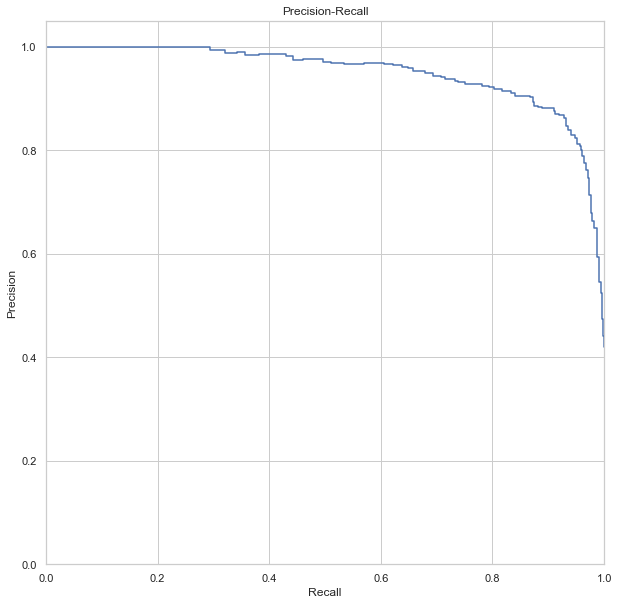

In [88]:
precision, recall, threshold = precision_recall_curve(y_test, rf_class1_probs)

sns.set_theme(style= "whitegrid")
plt.figure(figsize=(10,10))
plt.step(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall')
plt.show()

In [89]:
print('Random Forest AUC score: %.3f' % average_precision_score(y_test, rf_class1_probs)) 

Random Forest AUC score: 0.948


In [90]:
def custom_predict(X, threshold):
    
    return (rf_class1_probs > threshold).astype(int)
    
    
rf_thres_preds = custom_predict(X=x_test, threshold=rf_best_threshold) 

In [91]:
rf_thres_cm= confusion_matrix(y_test, rf_thres_preds)
print("\nRandom Forest Confusion Matrix:\n")
print(rf_thres_cm)


Random Forest Confusion Matrix:

[[2738   80]
 [  36  488]]


In [92]:
print(classification_report(y_test, rf_thres_preds, target_names=target_names))

              precision    recall  f1-score   support

 Not Churned       0.99      0.97      0.98      2818
     Churned       0.86      0.93      0.89       524

    accuracy                           0.97      3342
   macro avg       0.92      0.95      0.94      3342
weighted avg       0.97      0.97      0.97      3342



In [93]:
print("Brier score: %.3f"%brier_score_loss(y_test, rf_class1_probs))

Brier score: 0.033


* Model Tuning

In [94]:
rf_prmt = {"criterion": ["gini", "entropy"],
           "max_depth": range(17,25),
           "max_features": ["auto", "sqrt", "log2"],
           "class_weight": ['balanced', 'weight']}

In [95]:
rf_cv_model = GridSearchCV(rf, 
                           rf_prmt, 
                           cv = 10, 
                            n_jobs = -1)

In [96]:
rf_cv_model.fit(x_train, y_train)

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 367, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 758, in _validate_y_class_weight
    raise ValueError(


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'weight'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(17, 25),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [97]:
print("Best parameters:", rf_cv_model.best_params_)

Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 23, 'max_features': 'sqrt'}


In [98]:
rf_tuned= RandomForestClassifier(criterion=rf_cv_model.best_params_["criterion"], 
                             class_weight=rf_cv_model.best_params_["class_weight"],
                             max_depth=rf_cv_model.best_params_["max_depth"],
                             max_features=rf_cv_model.best_params_["max_features"]
                            )

rf_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=23, max_features='sqrt')

In [99]:
rf_tuned_predicts= rf_tuned.predict(x_test)

rf_tuned_cm= confusion_matrix(y_test, rf_tuned_predicts)
print("\nRandom Forest Confusion Matrix:\n")
print(rf_tuned_cm)


Random Forest Confusion Matrix:

[[2779   39]
 [ 105  419]]


In [100]:
print(classification_report(y_test, rf_tuned_predicts, target_names=target_names))

              precision    recall  f1-score   support

 Not Churned       0.96      0.99      0.97      2818
     Churned       0.91      0.80      0.85       524

    accuracy                           0.96      3342
   macro avg       0.94      0.89      0.91      3342
weighted avg       0.96      0.96      0.96      3342



* Final Model

In [101]:
rf_final = RandomForestClassifier(criterion=rf_cv_model.best_params_["criterion"], 
                             class_weight=rf_cv_model.best_params_["class_weight"],
                             max_depth=rf_cv_model.best_params_["max_depth"],
                             max_features=rf_cv_model.best_params_["max_features"])
rf_final.fit(x_train, y_train)
rf_final_class1_probs = rf_final.predict_proba(x_test)[:, 1] 

f1_list = []
for threshold in np.arange(0, 0.95, 0.01):
    rf_final_thres_predicts = rf_final_class1_probs > threshold
    precision = precision_score(y_test, rf_final_thres_predicts)
    recall = recall_score(y_test, rf_final_thres_predicts)
    f1 = f1_score(y_test, rf_final_thres_predicts)
    f1_list.append(f1)

    print("Threshold = {:.2f} | Accuracy = {:.3f}, Completeness = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Accuracy = 0.215, Completeness = 1.000 | F1 = 0.354
Threshold = 0.01 | Accuracy = 0.268, Completeness = 1.000 | F1 = 0.423
Threshold = 0.02 | Accuracy = 0.313, Completeness = 1.000 | F1 = 0.477
Threshold = 0.03 | Accuracy = 0.353, Completeness = 1.000 | F1 = 0.522
Threshold = 0.04 | Accuracy = 0.379, Completeness = 1.000 | F1 = 0.550
Threshold = 0.05 | Accuracy = 0.410, Completeness = 1.000 | F1 = 0.582
Threshold = 0.06 | Accuracy = 0.441, Completeness = 0.998 | F1 = 0.612
Threshold = 0.07 | Accuracy = 0.465, Completeness = 0.998 | F1 = 0.634
Threshold = 0.08 | Accuracy = 0.497, Completeness = 0.996 | F1 = 0.663
Threshold = 0.09 | Accuracy = 0.522, Completeness = 0.992 | F1 = 0.684
Threshold = 0.10 | Accuracy = 0.536, Completeness = 0.990 | F1 = 0.696
Threshold = 0.11 | Accuracy = 0.556, Completeness = 0.989 | F1 = 0.712
Threshold = 0.12 | Accuracy = 0.577, Completeness = 0.989 | F1 = 0.729
Threshold = 0.13 | Accuracy = 0.596, Completeness = 0.989 | F1 = 0.744
Thresh

In [102]:
f1_list = np.asarray(f1_list)
f1_list.max()


for threshold in np.arange(0, 0.95, 0.01):
    rf_final_thres_predicts = rf_final_class1_probs > threshold
    f1 = f1_score(y_test, rf_final_thres_predicts)
    if f1_list.max() == f1:
        rf_final_best_threshold = threshold


print("Maximum f1 score is: %.3f" % f1_list.max(),"and best threshold is:", rf_final_best_threshold)

Maximum f1 score is: 0.893 and best threshold is: 0.34


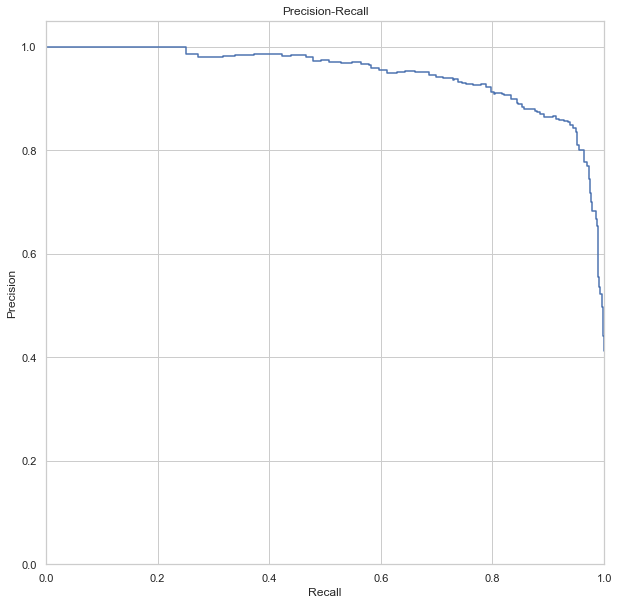

In [103]:
precision, recall, threshold = precision_recall_curve(y_test, rf_final_class1_probs)

sns.set_theme(style= "whitegrid")
plt.figure(figsize=(10,10))
plt.step(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall')
plt.show() 

In [104]:
print('Tuned Random Forest AUC score: %.3f' % average_precision_score(y_test, rf_final_class1_probs))

Tuned Random Forest AUC score: 0.945


In [105]:
def custom_predict(X, threshold):
    
    return (rf_final_class1_probs > threshold).astype(int)
    
    
rf_final_preds = custom_predict(X=x_test, threshold=rf_final_best_threshold) 

In [106]:
rf_final_cm= confusion_matrix(y_test, rf_final_preds)
print("\nRandom Forest Confusion Matrix:\n")
print(rf_final_cm)


Random Forest Confusion Matrix:

[[2735   83]
 [  34  490]]


In [107]:
print(classification_report(y_test, rf_final_preds, target_names=target_names))

              precision    recall  f1-score   support

 Not Churned       0.99      0.97      0.98      2818
     Churned       0.86      0.94      0.89       524

    accuracy                           0.96      3342
   macro avg       0.92      0.95      0.94      3342
weighted avg       0.97      0.96      0.97      3342



In [108]:
print("Brier score: %.3f"%brier_score_loss(y_test, rf_final_class1_probs))

Brier score: 0.034


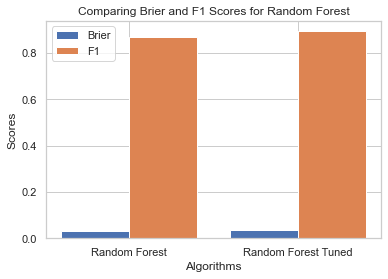

In [109]:
brier_scores = [brier_score_loss(y_test, rf_class1_probs), brier_score_loss(y_test, rf_final_class1_probs)]
f1_scores =[f1_score(y_test, rf_preds), f1_score(y_test, rf_final_preds)]
X = ['Random Forest','Random Forest Tuned']

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, brier_scores, 0.4, label = 'Brier')
plt.bar(X_axis + 0.2, f1_scores, 0.4, label = 'F1')
  
plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("Scores")
plt.title("Comparing Brier and F1 Scores for Random Forest")
plt.legend()
plt.show()

In [113]:
input_data= (43, 0, 2, 5, 25, 6, 2, 4, 10388, 1961, 0.703, 10294, 61, 0.649, 0.189, 0,1,0,0,0,0,0,0,1,0,0,0,0,1)
input_data= np.asarray(input_data)
input_data= input_data.reshape(1,-1)
prob= rf_final.predict_proba(input_data)[:, 1][0]

C:\Users\Mehmet\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [114]:
def custom_predict(X, threshold):

    return (prob > threshold).astype(int)
    
    
result = custom_predict(X=input_data, threshold = rf_final_best_threshold) 

print("The probability of churn: %", prob)

if result==1:
    print("\nThe person is churned")
else:
    print("\nThe person is still customer")

The probability of churn: % 0.86

The person is churned


# Comparing

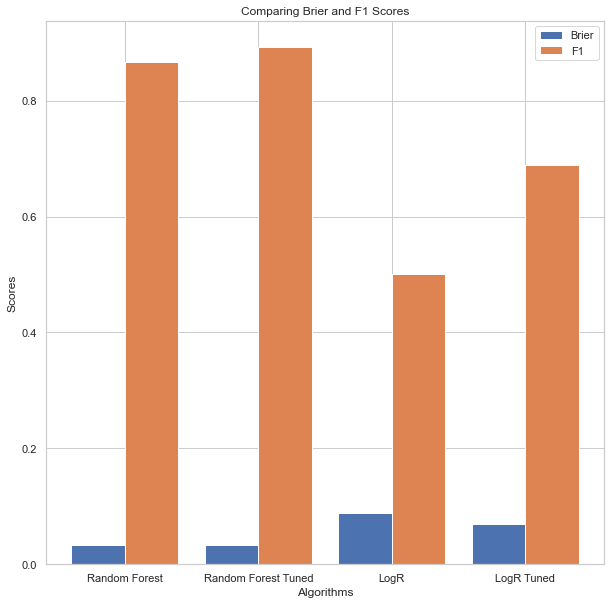

In [116]:
plt.figure(figsize=(10,10))

brier_scores = [brier_score_loss(y_test, rf_class1_probs), brier_score_loss(y_test, rf_final_class1_probs),
               brier_score_loss(y_test, logr_class1_probs), brier_score_loss(y_test, logr_class1_probs_tuned)]

f1_scores =[f1_score(y_test, rf_preds), f1_score(y_test, rf_final_preds),
           f1_score(y_test, logr_predicts), f1_score(y_test, logr_final_predicts)]

X = ['Random Forest','Random Forest Tuned',"LogR", "LogR Tuned"]

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, brier_scores, 0.4, label = 'Brier')
plt.bar(X_axis + 0.2, f1_scores, 0.4, label = 'F1')
  
plt.xticks(X_axis, X)
plt.xlabel("Algorithms")
plt.ylabel("Scores")
plt.title("Comparing Brier and F1 Scores")
plt.legend()
plt.show()